1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

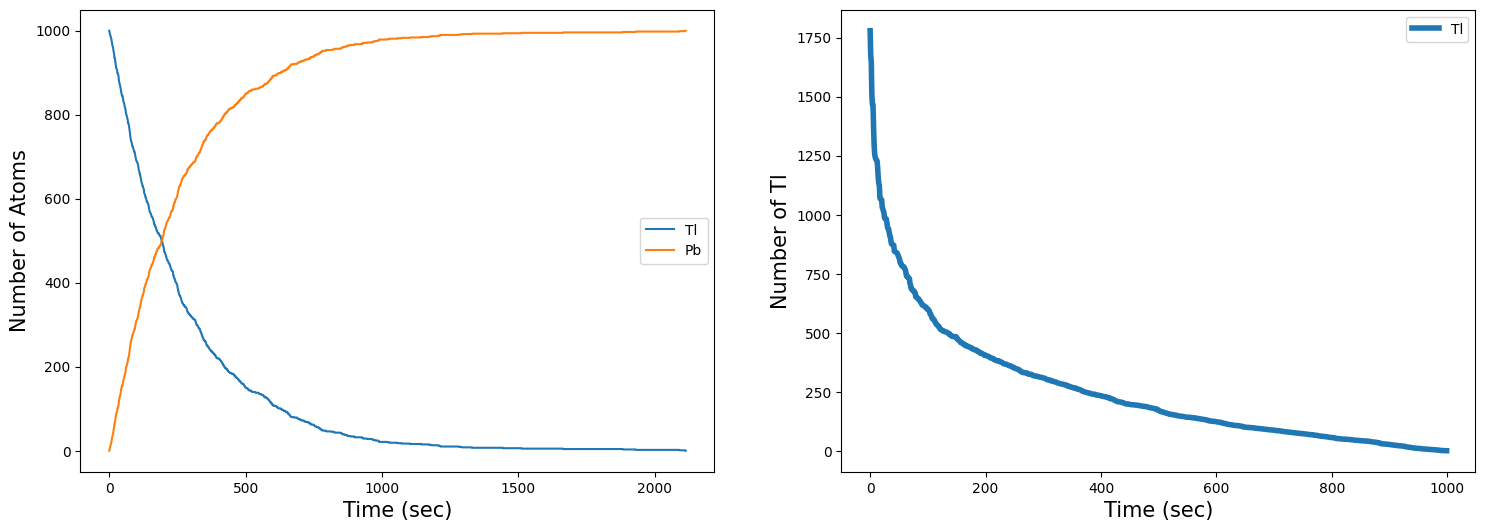

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tau = 3.052 * 60  
Tl_atoms = 1000
Tl_list = []
Tl_list.append(Tl_atoms)

for t in range(9999):
    if Tl_list[t] == 0:
        break
    rand_uni = np.random.uniform(size = Tl_list[t])
    decayed = sum(rand_uni < 1 - 2**(-1 / tau))
    Tl_list.append(Tl_list[t] - decayed)

                  
time_steps = np.linspace(0, len(Tl_list), len(Tl_list))


fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 6))
Pb_atoms = Tl_atoms - np.array(Tl_list)               
ax1.plot(time_steps, Tl_list, label='Tl')
ax1.plot(time_steps, Pb_atoms, label='Pb')
ax1.set_xlabel('Time (sec)', size = 15)
ax1.set_ylabel('Number of Atoms', size = 15)
ax1.legend()

def icdf(y):                              
    return -np.log(1 - y) / (np.log(2) / tau)

y = np.random.random(Tl_atoms)
decays = icdf(y)
decays_refined = np.sort(decays)[::-1]
ax2.set_xlabel('Time (sec)', size = 15)
ax2.set_ylabel('Number of Tl', size = 15)
ax2.plot(decays_refined, linewidth = 4, label = "Tl")
ax2.legend()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.sin(1/(1-x))**2

n_sample = 1000
n_integral = 100
integrals = []

for i in range(n_integral):
    counter = 0
    for j in range(n_sample):
        x = np.random.random() * 2
        y = np.random.random()
        
        if(y < f(x)):
            counter += 1
            
    integral = 2 * counter / n_sample
    integrals.append(integral)
    
print("Hit or Miss -> After 100 repeat, mean: ", np.mean(integrals), "std: ", np.std(integrals)/np.sqrt(n_integral))

x = np.random.random(n_sample) * 2
integral = np.sum(f(x)) * 2 / n_sample
print("Mean Value Method -> integral: ", integral)      

print("Correct result is 1.34691")      

print("Hit or Miss error: ", np.abs(1.34691 - np.mean(integrals)), " Mean Value error: ", np.abs(1.34691 - integral))


Hit or Miss -> After 100 repeat, mean:  1.34086 std:  0.002658007524443825
Mean Value Method -> integral:  1.3447204612364185
Correct result is 1.34691
Hit or Miss error:  0.006050000000000111  Mean Value error:  0.0021895387635815222


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
# 2D
n_sample = 100000
counter = 0   
for i in range(n_sample):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    
    if(x**2 + y**2 <= 1):
        counter += 1   
        
integral = 4 * counter / n_sample 
print("The result in 2D: ", integral)       
        
# 10D  
counter = 0   
for i in range(n_sample):
    x = np.random.uniform(-1,1,10)
    r = (x**2).sum()
    
    if(r <= 1):
        counter += 1
V = 2**10
integral = V * counter / n_sample
print("The result in 10D: ", integral)



The result in 2D:  3.13632
The result in 10D:  2.52928


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [4]:
n = 100000

def w(x):
    return x**(-1 / 2)

def f(x):
    return x**(-1 / 2) / (np.exp(x) + 1)  

x = np.random.random(n) ** 2  
integral = 1 / n * np.sum(f(x) / w(x)) * 2
print("Importance sampling method:", integral)

Importance sampling method: 0.838787154181292
